# 第8章 形态学图像处理

In [2]:
#导入本章示例用到的包,使用本文档中示例,先运行一次本段代码
import numpy as np
import cv2 as cv
from skimage import io,color,util,morphology,filters,measure
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

## 8.1.3 结构元素

### OpenCV提供的结构元素创建函数
- retval=cv.getStructuringElement(shape, ksize[, anchor])
    - Parameters    
        - shape,Element shape that could be one of MorphShapes(cv.MORPH_RECT, cv.MORPH_CROSS,cv.MORPH_ELLIPSE)
        - ksize,Size of the structuring element.
        - anchor,Anchor position within the element. The default value (−1,−1) means that the anchor is at the center. Note that only the shape of a cross-shaped element depends on the anchor position. In other cases the anchor just regulates how much the result of the morphological operation is shifted.

In [ ]:
kernel_cross =  cv.getStructuringElement(cv.MORPH_CROSS,(3,3))  #创建一个3×3的“+”字形结构元素
kernel_square = cv.getStructuringElement(cv.MORPH_RECT,(3,3))   #创建一个3×3的正方形结构元素
kernel_rect = cv.getStructuringElement(cv.MORPH_RECT,(1,5))     #创建一个1×5的线性结构元素
kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))  #创建一个7×7的椭圆形结构元素

#显示结构元素数组
print('cross:\n', kernel_cross)
print('square:\n',kernel_square)
print('rectangle:\n',kernel_rect)
print('ellipse:\n', kernel_ellipse)

### Scikit-image提供的结构元素创建函数

In [ ]:
selem_sq = morphology.square(5)  #创建一个5×5的正方形结构元素
selem_rect = morphology.rectangle(3,5)  #创建一个3×5的矩形结构元素
selem_dia = morphology.diamond(3)  #创建一个半径为3的菱形结构元素
selem_disk = morphology.disk(3)  #创建一个半径为3的圆盘形结构元素
selem_oct = morphology.octagon(7,4)  #创建一个7×4的八边形结构元素
selem_sq3 = np.ones((3,3),np.uint8) #构造Numpy数组创建3×3的正方形结构元素

#显示结构元素数组
print('square:\n',selem_sq)
print('rectangle:\n', selem_rect)
print('diamond:\n', selem_dia)
print('disk:\n', selem_disk)
print('octagon:\n', selem_oct)
print('square:\n', selem_sq3)

## 8.2 腐蚀与膨胀
### 8.2.1 腐蚀

- 顾名思义，形态学腐蚀能将图像中被腐蚀集合对应的前景区域收缩变小甚至消失、前景区域内孔洞变大。
- 结构元素的形状和尺寸对腐蚀结果影响很大

### 采用OpenCV函数
- dst= cv.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])
- dst=cv.morphologyEx(src, cv.MORPH_ERODE, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

### 示例：二值图像的形态学腐蚀

In [ ]:
#OpenCV: 二值图像形态学腐蚀

#读入二值图像
img = cv.imread('./imagedata/blobs.png', cv.IMREAD_GRAYSCALE)

#创建3*3方形结构元素
kernel_square = cv.getStructuringElement(cv.MORPH_RECT,(3,3)) 
#kernel_square = np.ones((3,3),np.uint8) 

#对二值图像进行腐蚀
img_erode1 = cv.erode(img,kernel_square,iterations = 1)
#img_erode1 = cv.morphologyEx(img, cv.MORPH_ERODE, kernel_square)

#创建大小为15*15椭圆形结构元素
kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15)) 
#对二值图像进行腐蚀
img_erode2 = cv.erode(img,kernel_ellipse)

#显示结果
plt.figure(figsize=(15,7))
plt.gray()

#原图像
plt.subplot(1,3,1); plt.imshow(img)
plt.title('Original image') 
plt.axis('off')
#3*3正方形结构元素腐蚀结果
plt.subplot(1,3,2); plt.imshow(img_erode1)
plt.title('Eroded by 3*3 square')
plt.axis('off') 
#15*15的椭圆形结构元素腐蚀结果
plt.subplot(1,3,3); plt.imshow(img_erode2)
plt.title('Eroded by 15*15 ellipse') 
plt.axis('off')

plt.show()

### 采用Scikit-image函数的二值图像的形态学腐蚀
- morphology.binary_erosion(image, selem=None, out=None)

In [ ]:
#Scikit-image: 二值图像形态学腐蚀示例

#读入二值图像
img = io.imread('./imagedata/blobs.png')

#创建3*3正方形结构元素
selem_sq = morphology.square(3) 
#对二值图像进行腐蚀
imgout1 = morphology.binary_erosion(img, selem_sq)
#结果数据类型为bool型,将其转换为uint8型
imgout1 = util.img_as_ubyte(imgout1)

#创建半径为7个像素的圆盘形结构元素
selem_disk = morphology.disk(7) 
#对二值图像进行腐蚀
imgout2 = morphology.binary_erosion(img, selem_disk)
#结果数据类型为bool型,将其转换为uint8型
imgout2 = util.img_as_ubyte(imgout2)

#显示结果
plt.figure(figsize=(15,8))
#原图像
plt.subplot(1,3,1); plt.imshow(img,cmap='gray')
plt.title('Original image') 
plt.axis('off')
#3*3正方形结构元素腐蚀结果
plt.subplot(1,3,2); plt.imshow(imgout1,cmap='gray')
plt.title('Eroded by 3*3 square')
plt.axis('off') 
#半径为7的圆盘形结构元素腐蚀结果
plt.subplot(1,3,3); plt.imshow(imgout2,cmap='gray')
plt.title('Eroded by r=7 disk') 
plt.axis('off')

plt.show()

### 8.2.2 膨胀

- 值图像形态学膨胀运算，能让图像中被膨胀集合对应的前景区域面积变大、区域内的孔洞收缩变小。
- 结构元素的形状和尺寸对膨胀结果影响很大

### 示例：二值图像形态学膨胀

#### 采用OpenCV函数
- dst=cv.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])
- dst=cv.morphologyEx(src, cv.MORPH_DILATE, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

In [ ]:
#OpenCV: 二值图像形态学膨胀示例

#读入二值图像
img = cv.imread('./imagedata/blobs.png', 0)

#创建高7像素垂直线形结构元素
kernel_line = np.ones((7,1),np.uint8) 
#膨胀
img_dilate1 = cv.dilate(img,kernel_line)
#img_dilate1 = cv.morphologyEx(img, cv.MORPH_DILATE, kernel_line,iterations = 1)

#创建7*7椭圆形结构元素
kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7)) 
#膨胀
img_dilate2 = cv.dilate(img,kernel_ellipse)

#显示结果
plt.figure(figsize=(15,8))
plt.gray()

#原图像
plt.subplot(1,3,1); plt.imshow(img,cmap='gray')
plt.title('Original image') 
plt.axis('off')
#高7像素垂直线形结构元素膨胀结果
plt.subplot(1,3,2); plt.imshow(img_dilate1)
plt.title('Dilated by vertical line')
plt.axis('off')
#7*7的椭圆形结构元素膨胀结果
plt.subplot(1,3,3); plt.imshow(img_dilate2)
plt.title('Dilated by 7*7 ellipse') 
plt.axis('off')

plt.show()

### 采用Scikit-image函数
- morphology.binary_dilation(image, selem=None, out=None)

In [ ]:
#Scikit-image: 二值图像形态学膨胀示例
#读入二值图像
img = io.imread('./imagedata/blobs.png')

#创建高7像素垂直线形结构元素
selem_line = np.ones((7,1),np.uint8) 
#膨胀
imgout1 = morphology.binary_dilation(img, selem_line)
#返回结果数据类型为bool型,将其转换为uint8型
imgout1 = util.img_as_ubyte(imgout1)

#创建半径为3个像素的圆盘形结构元素
selem_disk = morphology.disk(3) 
#膨胀
imgout2 = morphology.binary_dilation(img, selem_disk)
#返回结果数据类型为bool型,将其转换为uint8型
imgout2 = util.img_as_ubyte(imgout2)

#显示结果
plt.figure(figsize=(15,8))
#原图像
plt.subplot(1,3,1); plt.imshow(img,cmap='gray')
plt.title('Original image') 
plt.axis('off')
#高7像素垂直线形结构元素膨胀结果
plt.subplot(1,3,2); plt.imshow(imgout1,cmap='gray')
plt.title('Dilated by vertical line')
plt.axis('off')
#半径为3的圆盘形结构元素膨胀结果
plt.subplot(1,3,3); plt.imshow(imgout2,cmap='gray')
plt.title('Dilated by r=3 disk') 
plt.axis('off')

plt.show()

In [ ]:
#显示结构元素数组
print('vertical line:\n',selem_line)

## 8.3 开运算和闭运算

- 开运算一般能断开前景区域之间狭窄的连结，消除指定小尺寸的前景区域、或前景区域中细的突出物，使区域的轮廓变得光滑。
- 闭运算可以填充前景区域中小于结构元素的孔洞和缝隙，或令前景区域中的孔洞和缝隙变小。因此，闭运算能弥合前景区域之间狭窄的间断，去除小的孔洞，并填补轮廓线中的断裂。

### 示例：二值图像形态学开运算和闭运算的形态学滤波去噪


#### 采用OpenCV函数
- dst=cv.morphologyEx(src, cv.MORPH_OPEN, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])
- dst=cv.morphologyEx(src, cv.MORPH_CLOSE, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

In [ ]:
#OpenCV: 开运算/闭运算的形态学滤波去噪

#读入二值图像
img = cv.imread('./imagedata/noisy_rectangle.png', 0)

#创建25*25正方形结构元素
kernel_square = cv.getStructuringElement(cv.MORPH_RECT,(25,25))#(50,50))

#开运算
img_open = cv.morphologyEx(img, cv.MORPH_OPEN, kernel_square)
#闭运算
img_close = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel_square)

#对图像先开运算再闭运算
img_oc = cv.morphologyEx(img, cv.MORPH_OPEN, kernel_square)
img_oc = cv.morphologyEx(img_oc, cv.MORPH_CLOSE, kernel_square)

#显示结果
plt.figure(figsize=(15,8))
plt.gray()

#原图像
plt.subplot(1,4,1); plt.imshow(img)
plt.title('Original image') 
plt.axis('off')
#开运算结果
plt.subplot(1,4,2); plt.imshow(img_open)
plt.title('Opening')
plt.axis('off')
#闭运算结果
plt.subplot(1,4,3); plt.imshow(img_close)
plt.title('Closing') 
plt.axis('off')
#先开运算再闭运算结果
plt.subplot(1,4,4); plt.imshow(img_oc)
plt.title('Opening then Closing') 
plt.axis('off')

plt.show()

#### 采用Scikit-image函数
- morphology.binary_opening(image, selem=None, out=None)
- morphology.binary_closing(image, selem=None, out=None)

In [ ]:
#Scikit-image: 形态学开运算/闭运算的形态学滤波去噪示例
#读入二值图像
img = io.imread('./imagedata/noisy_rectangle.png')

#创建25*25正方形结构元素
selem_sq = morphology.square(25) 
#开运算
imgout1 = morphology.binary_opening(img,selem_sq)
#返回结果数据类型为bool型,将其转换为uint8型
imgout1 = util.img_as_ubyte(imgout1)

#闭运算
imgout2 = morphology.binary_closing(img,selem_sq)
#返回结果数据类型为bool型,将其转换为uint8型
imgout2 = util.img_as_ubyte(imgout2)

#对图像先开运算再闭运算
imgout3 = morphology.binary_opening(img,selem_sq)
imgout3 = morphology.binary_closing(imgout3,selem_sq)
#返回结果数据类型为bool型,将其转换为uint8型
imgout3 = util.img_as_ubyte(imgout3)

#显示结果
plt.figure(figsize=(15,8))
#原图像
plt.subplot(1,4,1); plt.imshow(img,cmap='gray')
plt.title('Original image') 
plt.axis('off')
#开运算结果
plt.subplot(1,4,2); plt.imshow(imgout1,cmap='gray')
plt.title('Opening')
plt.axis('off')
#闭运算结果
plt.subplot(1,4,3); plt.imshow(imgout2,cmap='gray')
plt.title('Closing') 
plt.axis('off')
#先开运算再闭运算结果
plt.subplot(1,4,4); plt.imshow(imgout3,cmap='gray')
plt.title('Opening then Closing') 
plt.axis('off')

plt.show()

## 8.4 击中/击不中变换
- 击中/击不中变换常用来检测二值图像中由1和0组成的某一特殊结构模式

### 示例：用击中/击不中变换检测二值图像中的“十”字型结构
#### 采用OpenCV函数
- dst=cv.morphologyEx(src, cv.MORPH_HITMISS, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

In [ ]:
#OpenCV: 形态学击中/击不中变换示例
#构造一幅二值图像
imgbw = np.array(
    [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,1,1,1,1,0,0,0,0,0],
     [0,1,1,1,0,0,0,0,0,0,0,1,1,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,1,1,1,0],
     [0,0,0,0,0,1,0,0,0,0,0,0,1,0,0],
     [0,0,0,0,1,1,1,0,0,0,0,0,0,0,0], 
     [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).astype(np.uint8)

#创建3*3十字形结构元素,-1为背景，1为前景
kernel = np.array([[-1,1,-1],
                   [ 1,1, 1],
                   [-1,1,-1]])

#击中/击不中变换
imgout = cv.morphologyEx(imgbw, cv.MORPH_HITMISS, kernel)
#显示计算结果数组
print('hit_or_miss result:\n',imgout.astype(np.uint8))

#显示结果
plt.figure(figsize=(12,8))
plt.gray()

#以图象方式显示原始数组
plt.subplot(1,2,1), plt.imshow(imgbw)
plt.title('Original image') 
plt.axis('off')
#击中/击不中变换结果
plt.subplot(1,2,2), plt.imshow(imgout)
plt.title('hit_or_miss result')
plt.axis('off')

plt.show()

### 采用SciPy函数
- scipy.ndimage.binary_hit_or_miss(input, structure1=None, structure2=None, output=None, origin1=0, origin2=None)

In [ ]:
#SciPy: 形态学击中/击不中变换示例

#构造一幅二值图像
imgbw = np.array(
    [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,1,1,1,1,0,0,0,0,0],
     [0,1,1,1,0,0,0,0,0,0,0,1,1,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,1,1,1,0],
     [0,0,0,0,0,1,0,0,0,0,0,0,1,0,0],
     [0,0,0,0,1,1,1,0,0,0,0,0,0,0,0], 
     [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).astype(np.uint8)

#创建3*3十字形结构元素
se1 = np.array([[0,1,0],
                [1,1,1],
                [0,1,0]]).astype(np.uint8)
#创建背景结构元素,为se1的补集
se2 = 1- se1

#击中/击不中变换
imgout = ndimage.binary_hit_or_miss(imgbw,se1,se2)
#显示计算结果数组
print('hit_or_miss result:\n',imgout.astype(np.uint8))

#显示结果
plt.figure(figsize=(12,8))
#以图象方式显示原始数组
plt.subplot(1,2,1), plt.imshow(imgbw,cmap='gray')
plt.title('Original image') 
plt.axis('off')
#击中/击不中变换结果
plt.subplot(1,2,2), plt.imshow(imgout,cmap='gray')
plt.title('hit_or_miss result')
plt.axis('off')

plt.show()

## 8.5 二值图像形态学处理应用
### 8.5.1 边界提取

### 示例：区域边界的提取

In [ ]:
#二值图像中区域边界的提取

#读入二值图像
img = io.imread('./imagedata/circles.png')

#创建3*3十字形结构元素
se = np.array([[0,1,0],
               [1,1,1],
               [0,1,0]]).astype(np.uint8)

#区域内边界
#对图像腐蚀
img_erode = morphology.binary_erosion(img,se)
#结果数据类型为bool型,将其转换为uint8型
img_erode = util.img_as_ubyte(img_erode)
#从原图像中减去腐蚀结果得到区域内边界
img_Boundary1 = img - img_erode

#区域外边界
#对图像膨胀
img_dilate = morphology.binary_dilation(img, se)
#结果数据类型为bool型,将其转换为uint8型
img_dilate = util.img_as_ubyte(img_dilate)
#膨胀结果减去原图像得到区域外边界
img_Boundary2 = img_dilate - img

#显示结果
plt.figure(figsize=(16,8))
#原图象
plt.subplot(1,3,1); plt.imshow(img,cmap='gray')
plt.title('Original image') 
plt.axis('off')
#区域内边界
plt.subplot(1,3,2); plt.imshow(img_Boundary1,cmap='gray')
plt.title('Inner boundary')
plt.axis('off')
#区域外边界
plt.subplot(1,3,3); plt.imshow(img_Boundary1,cmap='gray')
plt.title('Outer boundary')
plt.axis('off')

plt.show()

### 8.5.2 孔洞填充

- 二值图像中的孔洞，定义为被前景像素连接而成的边界所包围的背景区域。
- 孔洞填充，就是把孔洞区域变为前景。

#### 采用OpenCV函数
- retval, image, mask, rect=cv.floodFill(image, mask, seedPoint, newVal[, loDiff[, upDiff[, flags]]])

### 示例：区域孔洞填充

In [ ]:
#OpenCV: 孔洞填充

#读取一幅灰度图像
img = cv.imread('./imagedata/coins.jpg', 0)

#对灰度图像进行阈值分割得到二值图像
#采用Otsu方法得到最优阈值
th, imgbw = cv.threshold(img, 0, 255, cv.THRESH_OTSU|cv.THRESH_BINARY)
    
#复制二值图像
img_floodfill = imgbw.copy()
#创建mask
#获取图像高/宽
rows, cols = img.shape[0:2]
mask = np.zeros([rows+2, cols+2], np.uint8)

#找到背景点，floodFill函数中的seedPoint对应像素必须是背景0
exit_flag = False
for i in range(imgbw.shape[0]):
    for j in range(imgbw.shape[1]):
        if(imgbw[i][j]==0):
            seedPoint=(j,i)
            exit_flag = True
            break
        if exit_flag: break
#采用漫水填充
cv.floodFill(img_floodfill, mask, seedPoint, 255) 
#对填充结果取非
img_floodfill_inv = cv.bitwise_not(img_floodfill)
#将imgbw与img_floodfill_inv进行“或”运算，得到最终结果
img_filled = cv.bitwise_or(imgbw, img_floodfill_inv)
 
#显示结果
plt.figure(figsize=(16,8))
plt.gray()

#原图像
plt.subplot(1,3,1); plt.imshow(img)
plt.title('Original image') 
plt.axis('off')
#阈值分割得到的二值图像
plt.subplot(1,3,2); plt.imshow(imgbw)
plt.title('Binary image with holse')
plt.axis('off')
#孔洞填充结果
plt.subplot(1,3,3); plt.imshow(img_filled)
plt.title('Holes filled image')
plt.axis('off')

plt.show()

#### 采用SciPy函数
- scipy.ndimage.binary_fill_holes(input, structure=None, output=None, origin=0)

In [ ]:
#SciPy: 孔洞填充示例
#读取一幅灰度图像
img = io.imread('./imagedata/coins.jpg')

#对灰度图像进行阈值分割得到二值图像
#采用Otsu方法得到最优阈值
thresh = filters.threshold_otsu(img)
#阈值分割,结果数据类型为bool型
img_bw = img > thresh

#填充孔洞
img_fill = ndimage.binary_fill_holes(img_bw)
#结果数据类型为bool型,将其转换为uint8型
img_fill = util.img_as_ubyte(img_fill)

#显示结果
plt.figure(figsize=(16,8))

#原图像
plt.subplot(1,3,1); plt.imshow(img,cmap='gray')
plt.title('Original image') 
plt.axis('off')
#阈值分割得到的二值图像
plt.subplot(1,3,2); plt.imshow(img_bw,cmap='gray')
plt.title('Binary image with holse')
plt.axis('off')
#孔洞填充结果
plt.subplot(1,3,3); plt.imshow(img_fill,cmap='gray')
plt.title('Holes filled image')
plt.axis('off')

plt.show()

### 8.5.3 连通域（分量）的提取

- 从二值图像中提取连通域，是多数图像分析应用的核心步骤。

### 示例：二值图像中连通域的标记提取与属性计算

#### 使用OpenCV函数
- computes the connected components labeled image of boolean image
    - retval, labels=cv.connectedComponents(image[, labels[, connectivity[, ltype]]])
- computes the connected components labeled image of boolean image and also produces a statistics output for each label
    - retval, labels, stats, centroids=cv.connectedComponentsWithStats(image[, labels[, stats[, centroids[, connectivity[, ltype]]]]])

In [ ]:
#OpenCV:连通域的提取之标记
#构造一幅二值图像
imgbw = np.array(
    [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,1,1,1,1,0,0,0,0,0],
     [0,1,1,1,0,0,0,0,0,0,0,1,1,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,1,1,1,0],
     [0,0,0,0,0,1,0,0,0,0,0,0,1,0,0],
     [0,0,0,0,1,1,1,0,0,0,0,0,0,0,0], 
     [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).astype(np.uint8)

#对二值图像连通域进行标记label image regions
#返回值retval为图像中所有连通域的数目，包括背景也作为一个连通域，前景目标为retval-1
retval, img_labels = cv.connectedComponents(imgbw, connectivity=8)

#显示图像中前景区域数量，和标记后的图像
print('Number of regions:',retval-1)
print('Labeled image:\n',img_labels)

In [ ]:
#OpenCV: 二值图像中连通域的提取及区域属性计算

#读取一幅灰度图像
img = cv.imread('./imagedata/coins.jpg',0)
#获取图像高/宽
rows, cols = img.shape[0:2]

#采用Otsu方法对灰度图像进行阈值分割得到二值图像
th, imgbw = cv.threshold(img, 0, 255, cv.THRESH_OTSU|cv.THRESH_BINARY)

#填充孔洞，采用SciPy函数
img_filled = ndimage.binary_fill_holes(imgbw)
#结果数据类型为bool型,将其转换为uint8型
img_filled = util.img_as_ubyte(img_filled)

#对二值图像进行标记，并计算图像中连通域的属性
retval, labels, stats, centroids=cv.connectedComponentsWithStats(img_filled)

#将每个区域的包围盒(bounding box)叠加绘制到原图像上
#返回区域属性stats为retval*5的二维数组，第0行为标号0的背景区域属性
#[x,y,width,height,area]
imgresult = img.copy()
for rlabel in range(1,stats.shape[0]):    
    #画包围盒
    rect = stats[rlabel,0:4]
    imgresult = cv.rectangle(imgresult, rect, 255,2)

#显示结果
plt.figure(figsize=(16,6))
plt.gray()

#原图像
plt.subplot(1,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('Original image')
plt.axis('off')
#孔洞填充结果
plt.subplot(1,3,2); plt.imshow(img_filled)
plt.title('Holes filled image')
plt.axis('off')
plt.subplot(1,3,3); plt.imshow(imgresult,vmin=0,vmax=255)
plt.title('regons overlayed bounding box')
plt.axis('off')

plt.show()

### Scikit-image函数
- skimage.morphology.label(input, neighbors=None, background=None, return_num=False, connectivity=None)
- skimage.measure.regionprops(label_image, intensity_image=None, cache=True, coordinates=None)

- #### 先用函数measure.label()对二值图像连通域进行标记，
- #### 再用函数measure.regionprops()来测量对于标记后的图像中每个连通域的属性，如区域面积、质心、包围盒等等。

In [ ]:
#Scikit-image： 连通域的提取之标记
#构造一幅二值图像
imgbw = np.array(
    [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,1,1,1,1,0,0,0,0,0],
     [0,1,1,1,0,0,0,0,0,0,0,1,1,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,1,1,1,0],
     [0,0,0,0,0,1,0,0,0,0,0,0,1,0,0],
     [0,0,0,0,1,1,1,0,0,0,0,0,0,0,0], 
     [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).astype(np.uint8)

#对二值图像连通域进行标记label image regions
img_label,regions = measure.label(imgbw,return_num=True)

#显示标记后的图像
print('Number of regions:',regions)
print('Labeled image:\n',img_label)

In [ ]:
#Scikit-image: 二值图像中连通域的提取及区域属性计算
#读取一幅灰度图像
img = io.imread('./imagedata/coins.jpg')

#阈值分割,结果数据类型为bool型
thresh = filters.threshold_otsu(img)
img_bw = img > thresh
#填充孔洞
img_bw = ndimage.binary_fill_holes(img_bw)

#对二值图像连通域进行标记label image regions
img_label = measure.label(img_bw)
#对标记图像进行伪彩色处理,令标号0为背景区域,显示为白色
img_label_psc = color.label2rgb(img_label,bg_label=0,bg_color=np.array([1,1,1]))
#结果数据类型为bool型,将其转换为uint8型
img_label_psc  = util.img_as_ubyte(img_label_psc )

# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
img_label_overlay = color.label2rgb(img_label,image=img, bg_label=0)
#结果数据类型为bool型,将其转换为uint8型
img_label_overlay  = util.img_as_ubyte(img_label_overlay )

#计算图像中连通域的属性
RegionProperties = measure.regionprops(img_label)

#将每个区域的包围盒、等效圆叠加绘制到伪彩色图像上
for region in RegionProperties:
    # take regions with large enough areas
    if region.area >= 100:
        
        #获取连通区域质心坐标
        #crow,ccol = region.centroid
        #crow = np.int(crow)
        #ccol = np.int(ccol)
        #获取连通域等效直径
        #radius = np.int(region.equivalent_diameter/2)
        #画圆
        #img_label_overlay = cv.circle(img_label_overlay,(ccol,crow), radius, (255,0,0),2)
        
        #获取连通域包围盒的左上/右下顶点行列值 
        minr, minc, maxr, maxc = region.bbox
        #画绿色矩形包围盒draw rectangle around segmented coins
        img_label_overlay = cv.rectangle(img_label_overlay,(minc,minr),(maxc,maxr),(0,255,0),1)
        
#显示结果
plt.figure(figsize=(16,8))
plt.gray()

#原图像
plt.subplot(1,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('Original image')
plt.axis('off')
#标记图像进行伪彩色处理结果
plt.subplot(1,3,2); plt.imshow(img_label_psc)
plt.title('Labeled image,pseudo-color')
plt.axis('off')
#标记图像伪彩色处理,连通域包围盒叠加到原始图像结果
plt.subplot(1,3,3); plt.imshow(img_label_overlay)
plt.title('Labeled image overlay,pseudo-color')
plt.axis('off')

plt.show()

## 8.6 灰度图像的形态学处理
### 8.6.1 灰度图像的腐蚀
- 对灰度图像的腐蚀，将导致图像整体变暗，较亮的纹理结构将收缩变小、甚至消失，暗的纹理结构将会扩大，程度取决于结构元素b的尺寸。
- 灰度图像的腐蚀运算效果，与“第3章 空域滤波”介绍的最小值滤波器有相似之处。

### 8.6.2 灰度图像的膨胀
- 对灰度图像的膨胀，将导致图像整体变亮，较暗的纹理结构将收缩变小、甚至消失，亮的纹理结构将会扩大，程度取决于结构元素b的尺寸。
- 对灰度图像的膨胀效果，与在“第3章 空域滤波”介绍的最大值滤波器有相似之处。

### 示例：灰度图像的腐蚀与膨胀

#### 采用OpenCV函数

In [ ]:
#OpenCV: 用平坦方形结构元素对灰度图像进行腐蚀/膨胀示例
#读入一幅灰度图像
img = cv.imread('./imagedata/cameraman.tif',0)

#创建大小为5*5圆形结构元素
kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)) 
#灰度腐蚀
imgout1 = cv.erode(img, kernel_ellipse)
#灰度膨胀
imgout2 = cv.dilate(img, kernel_ellipse)

#显示结果
plt.figure(figsize=(15,8))
plt.gray()

#原图像
plt.subplot(1,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('Original image') 
plt.axis('off')
#灰度腐蚀结果
plt.subplot(1,3,2); plt.imshow(imgout1,vmin=0,vmax=255)
plt.title('Eroded by ellipse')
plt.axis('off')
#灰度膨胀结果
plt.subplot(1,3,3); plt.imshow(imgout2,vmin=0,vmax=255)
plt.title('Dilated by ellipse')
plt.axis('off')

plt.show()

#### 采用Scikit-image函数

In [ ]:
#Scikit-image: 用平坦方形结构元素对灰度图像进行腐蚀/膨胀示例
#读入一幅灰度图像
img = io.imread('./imagedata/cameraman.tif')

#创建圆盘形结构元素
selem_disk = morphology.disk(3) #半径=3
#灰度腐蚀
imgout1 = morphology.erosion(img, selem_disk)
#灰度膨胀
imgout2 = morphology.dilation(img, selem_disk)

#显示结果
plt.figure(figsize=(15,8))
plt.gray()

#原图像
plt.subplot(1,3,1); plt.imshow(img)
plt.title('Original image') 
plt.axis('off')
#灰度腐蚀结果
plt.subplot(1,3,2); plt.imshow(imgout1)
plt.title('Eroded by disk')
plt.axis('off')
#灰度膨胀结果
plt.subplot(1,3,3); plt.imshow(imgout2)
plt.title('Dilated by disk')
plt.axis('off')

plt.show()

### 8.6.3 灰度图像的开运算和闭运算

- 用结构元素b对图像f的开运算，定义为先对图像f进行腐蚀，再对结果进行膨胀。开运算可以消除灰度图像中与结构元素相比尺寸较小的亮细节，而保持图像整体灰度值和大的亮区域基本不受影响。

- 用结构元素b对图像f的闭运算，定义为先对图像f进行膨胀、再对结果进行腐蚀。闭运算可以消除图像中与结构元素相比尺寸较小的暗细节，而保持图像整体灰度值和大的暗区域基本不受影响。


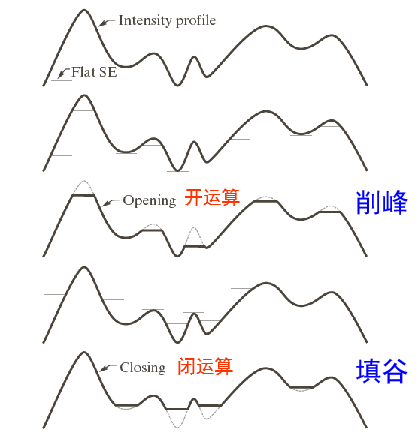

### 示例：灰度图像的开运算和闭运算

### 采用OpenCV函数

In [ ]:
#OpenCV:灰度图像的开运算/闭运算示例
#读入一幅灰度图像
img = cv.imread('./imagedata/cameraman.tif',0)

#创建3*3方形结构元素
kernel_square = cv.getStructuringElement(cv.MORPH_RECT,(3,3))

#灰度开运算
img_open = cv.morphologyEx(img, cv.MORPH_OPEN, kernel_square)
#灰度闭运算
img_close = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel_square)

#对图像先开运算再闭运算
img_oc = cv.morphologyEx(img, cv.MORPH_OPEN, kernel_square)
img_oc = cv.morphologyEx(img_oc, cv.MORPH_CLOSE, kernel_square)

#显示结果
plt.figure(figsize=(18,8))
plt.gray()

#原图像
plt.subplot(1,4,1); plt.imshow(img)
plt.title('Original image') 
plt.axis('off')
#灰度闭运算结果
plt.subplot(1,4,2); plt.imshow(img_open)
plt.title('Opening by square')
plt.axis('off')
#灰度闭运算结果
plt.subplot(1,4,3); plt.imshow(img_close)
plt.title('Closing by square')
plt.axis('off')
#先开运算再闭运算结果
plt.subplot(1,4,4); plt.imshow(img_oc)
plt.title('Opening then Closing') 
plt.axis('off')

plt.show()

### 采用Scikit-image函数

In [ ]:
#Scikit-image: 灰度图像的开运算/闭运算示例
#读入一幅灰度图像
img = io.imread('./imagedata/cameraman.tif')

#创建正方形结构元素
selem_sq = morphology.square(3) #3*3
#灰度开运算
imgout1 = morphology.opening(img, selem_sq)
#灰度闭运算
imgout2 = morphology.closing(img, selem_sq)

#对图像先开运算再闭运算
imgout3 = morphology.opening(img, selem_sq)
imgout3 = morphology.closing(imgout3, selem_sq)

#显示结果
plt.figure(figsize=(18,8))
plt.gray()

#原图像
plt.subplot(1,4,1); plt.imshow(img)
plt.title('Original image') 
plt.axis('off')
#灰度闭运算结果
plt.subplot(1,4,2); plt.imshow(imgout1)
plt.title('Opening by square')
plt.axis('off')
#灰度闭运算结果
plt.subplot(1,4,3); plt.imshow(imgout2)
plt.title('Closing by square')
plt.axis('off')
#先开运算再闭运算结果
plt.subplot(1,4,4); plt.imshow(imgout3 )
plt.title('Opening then Closing') 
plt.axis('off')

plt.show()

### 8.6.4 灰度图像形态学算法的应用
### 1.顶帽变换和底帽变换

- 顶帽变换对一幅灰度图像进行开运算，可以从图像中去除亮物体，随后的求差运算就可以得到一幅仅保留上述被去除亮物体的图像。顶帽变换常用于用于提取暗背景上的亮物体。
- 底帽变换对一幅灰度图像进行闭运算，可以从图像中去除暗物体，随后的求差运算就可以得到一幅仅保留上述被去除暗物体的图像。底帽变换则适用于提取亮背景上的暗物体。

### 示例：用顶帽变换校正图像不均匀光照的影响

### 采用OpenCV函数

In [ ]:
#OpenCV:采用顶帽变换校正图像不均匀光照对阈值分割的影响

#读取一幅灰度图像
img = cv.imread('./imagedata/rice.png', 0)

#采用Otsu方法对灰度图像进行阈值分割得到二值图像
th, img_bw = cv.threshold(img, 0, 255, cv.THRESH_OTSU|cv.THRESH_BINARY)

#创建大小为19*19椭圆形结构元素
kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE,(19,19)) 
#灰度开运算
img_open = cv.morphologyEx(img, cv.MORPH_OPEN, kernel_ellipse)
#得到顶帽变换结果
imgres1 = cv.subtract(img,img_open)

#直接进行顶帽变换tophat
imgres2 =  cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel_ellipse)
#对背景光照校正后的图像进行阈值分割
th, img_bw2 = cv.threshold(imgres2, 0, 255, cv.THRESH_OTSU|cv.THRESH_BINARY)

#显示结果
plt.figure(figsize=(12,8))
plt.gray()

#原图像
plt.subplot(2,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('Original image') 
plt.axis('off')
#光照校正前阈值分割结果
plt.subplot(2,3,2); plt.imshow(img_bw,vmin=0,vmax=255)
plt.title('threshold_otsu binary image ')
plt.axis('off')
#灰度开运算结果
plt.subplot(2,3,3); plt.imshow(img_open,vmin=0,vmax=255)
plt.title('Opening result')
plt.axis('off')
#顶帽变换结果
plt.subplot(2,3,4); plt.imshow(imgres2)
plt.title('tophat result')
plt.axis('off')
#光照校正后阈值分割结果
plt.subplot(2,3,5); plt.imshow(img_bw2,vmin=0,vmax=255)
plt.title('threshold_otsu binary image after tophat')
plt.axis('off')

plt.show()

### 采用Scikit-image函数

In [ ]:
#Scikit-image: 采用顶帽变换校正图像不均匀光照对阈值分割的影响
#读取一幅灰度图像
img = io.imread('./imagedata/rice.png')

#阈值分割
#采用Otsu方法得到最优阈值
thresh = filters.threshold_otsu(img)
#阈值分割,结果数据类型为bool型
img_bw = img > thresh

#创建一个半径为12的平坦圆盘形形结构元素
selem_disk = morphology.disk(12) #半径=12

#灰度开运算
img_open = morphology.opening(img,selem_disk)
#得到白顶帽变换结果
imgres1 = img - img_open

#采用白顶帽变换white_tophat函数校正图像背景光照
imgres2 =  morphology.white_tophat(img,selem_disk)

#对背景光照校正后的图像进行阈值分割
thresh2 = filters.threshold_otsu(imgres2)
#阈值分割,结果数据类型为bool型
img_bw2 = imgres2 > thresh2

#显示结果
plt.figure(figsize=(12,8))
plt.gray()

#原图像
plt.subplot(2,3,1); plt.imshow(img)
plt.title('Original image') 
plt.axis('off')
#光照校正前阈值分割结果
plt.subplot(2,3,2); plt.imshow(img_bw)
plt.title('threshold_otsu binary image ')
plt.axis('off')
#灰度开运算结果
plt.subplot(2,3,3); plt.imshow(img_open,vmin=0,vmax=255)
plt.title('Opening result')
plt.axis('off')
#白顶帽变换结果
plt.subplot(2,3,4); plt.imshow(imgres2,vmin=0,vmax=255)
plt.title('white_tophat result')
plt.axis('off')
#光照校正后阈值分割结果
plt.subplot(2,3,5); plt.imshow(img_bw2)
plt.title('threshold_otsu binary image after white_tophat')
plt.axis('off')

plt.show()

### 示例：利用顶帽变换去除灰度图像中的小目标区域
- Removing small objects in grayscale images with a top hat filter
- This example shows how to remove small objects from grayscale images. The top-hat transform 1 is an operation that extracts small elements and details from given images. Here we use a white top-hat transform, which is defined as the difference between the input image and its (mathematical morphology) opening.

### 采用OpenCV函数

In [ ]:
#OpenCV: 利用顶帽变换去除灰度图像中的小目标区域

#以灰度方式读取一幅彩色图像
img = cv.imread('./imagedata/hubble_deep_field.jpg',0)

#创建大小为9*9的椭圆形结构元素
kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))
#顶帽变换
img_tophat =  cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel_ellipse)
#原图像减去顶帽变换结果
imgout = cv.subtract(img,img_tophat)

#显示结果
plt.figure(figsize=(16,8))
plt.gray()

#原图像
plt.subplot(1,3,1), plt.imshow(img)
plt.title('Original image') 
plt.axis('off')
#白顶帽变换结果
plt.subplot(1,3,2), plt.imshow(img_tophat)
plt.title('tophat result')
plt.axis('off')
#最终结果
plt.subplot(1,3,3), plt.imshow(imgout)
plt.title('Removing small objects in image')
plt.axis('off')

plt.show()

### 采用Scikit-image函数

In [ ]:
#Scikit-image: 利用顶帽变换去除灰度图像中的小目标区域

#以灰度方式读取一幅彩色图像
img = io.imread('./imagedata/hubble_deep_field.jpg',as_gray=True)
img = util.img_as_ubyte(img)
#创建圆盘形结构元素
selem_disk =  morphology.disk(5) #半径=5
#白顶帽变换
imgres = morphology.white_tophat(img, selem_disk)
#原图像减去白顶帽变换结果
imgout =img.astype(np.float32) - imgres.astype(np.float32) 
imgout = np.clip(imgout,0,255).astype(np.uint8)

#显示结果
plt.figure(figsize=(16,8))
#原图像
plt.subplot(1,3,1), plt.imshow(img,cmap='gray')
plt.title('Original image') 
plt.axis('off')
#白顶帽变换结果
plt.subplot(1,3,2), plt.imshow(imgres,cmap='gray')
plt.title('white_tophat result')
plt.axis('off')
#最终结果
plt.subplot(1,3,3), plt.imshow(imgout,cmap='gray')
plt.title('Removing small objects in image')
plt.axis('off')

plt.show()

### 2.漫水填充
- 类似于图像处理软件中的“油漆桶”工具
    - retval, image, mask, rect = cv.floodFill(image, mask, seedPoint, newVal[, loDiff[, upDiff[, flags]]])
    - skimage.morphology.flood_fill(image, seed_point, new_value, *, selem=None, connectivity=None, tolerance=None, in_place=False, inplace=None)

In [ ]:
#漫水填充示例(Flood Fill Algorithm),类似于图像处理软件中的“油漆桶”工具

#读取一幅灰度图像
img_g = io.imread('./imagedata/rice.png')
#读入一幅彩色图像
img_c = io.imread('.\imagedata\Bridewedding.jpeg')

#Scikit-image：对灰度图像的背景区域进行漫水填充
img_gfilled1 = morphology.flood_fill(img_g,seed_point=(1,1), new_value=0,tolerance=10)
#采用不同的种子点及灰度值容差
img_gfilled2 = morphology.flood_fill(img_g,seed_point=(250,250), new_value=0,tolerance=60)

#OpenCV: 将彩色图像的蓝色背景区域漫水填充为白色
#获取图像的高/宽
rows, cols = img_c.shape[:2]
#创建mask
mask = np.zeros([rows+2, cols+2], np.uint8)
img_cfilled1 = img_c.copy()
#漫水填充
cv.floodFill(img_cfilled1, mask, (0,0), (255,255,255),(20,20,50),(20,20,50), \
             cv.FLOODFILL_FIXED_RANGE)
#采用另一组颜色分量值容差
#创建mask
mask = np.zeros([rows+2, cols+2], np.uint8)
img_cfilled2 = img_c.copy()
#漫水填充
cv.floodFill(img_cfilled2, mask, (0,0), (255,255,255),(50,50,150),(50,50,150), \
             cv.FLOODFILL_FIXED_RANGE)

#显示结果
plt.figure(figsize=(16,10))

#原灰度图像
plt.subplot(2,3,1); plt.imshow(img_g,cmap='gray')
plt.title('Original gray image') 
plt.axis('off')
#灰度图像漫水填充结果
plt.subplot(2,3,2); plt.imshow(img_gfilled1,cmap='gray')
plt.title('FloodFill result')
plt.axis('off')
#不同种子点及灰度值容差漫水填充结果
plt.subplot(2,3,3); plt.imshow(img_gfilled2,cmap='gray')
plt.title('FloodFill result,another seed and tolerance')
plt.axis('off')

#原彩色图像
plt.subplot(2,3,4); plt.imshow(img_c)
plt.title('Original color image')
plt.axis('off')
#彩色图像漫水填充结果
plt.subplot(2,3,5); plt.imshow(img_cfilled1)
plt.title('FloodFill result')
plt.axis('off')
#采用另一组颜色分量值容差漫水填充结果
plt.subplot(2,3,6); plt.imshow(img_cfilled2)
plt.title('FloodFill result,another tolerance')
plt.axis('off')

plt.show()

# The end